## 3C. Smoothing and Sharpening Filters

**1.	Smoothing Filters:**

o	Reduce noise and smooth an image.

o	Mean filter: Average of neighboring pixels → simple smoothing.

o	Gaussian filter: Weighted average based on Gaussian distribution → preserves edges better.

o	Median filter: Median of neighboring pixels → removes salt-and-pepper noise effectively.

**2.	Sharpening (High-Pass) Filters:**

o	Enhance edges and high-frequency components.

o	Laplacian filter: Uses second derivative to highlight edges.

o	High-pass kernel: Custom kernel emphasizes high-frequency regions to sharpen details.



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the image with error handling
try:
    image = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError("Image file 'lena.jpg' not found.")
except FileNotFoundError as e:
    print(f"❌ Error: {e}")
    exit()

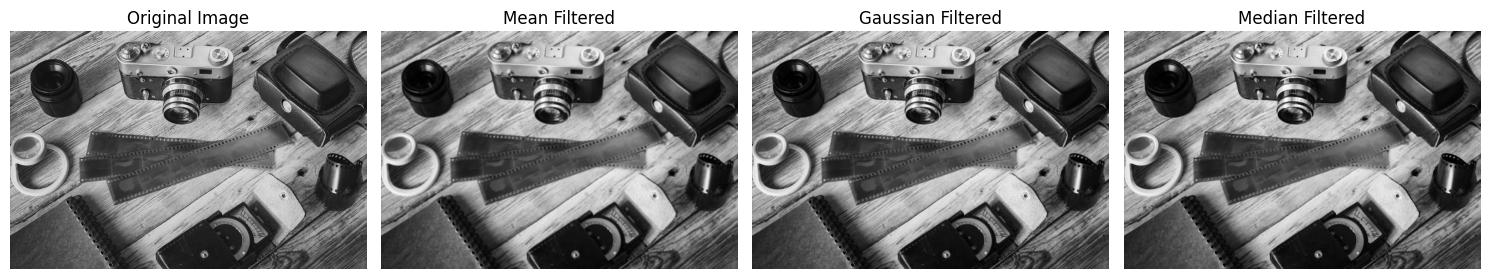

In [3]:
# --- 1. Smoothing Filters ---
kernel_size = (5, 5)
mean_filtered = cv2.blur(image, kernel_size)# Mean Filter
gaussian_filtered = cv2.GaussianBlur(image, kernel_size, 0)# Gaussian Filter
median_filtered = cv2.medianBlur(image, 5)  ## Median Filter and it  Must be odd
# Display Smoothing Results
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(mean_filtered, cmap='gray')
plt.title("Mean Filtered")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title("Gaussian Filtered")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filtered")
plt.axis('off')

plt.tight_layout()
plt.show()

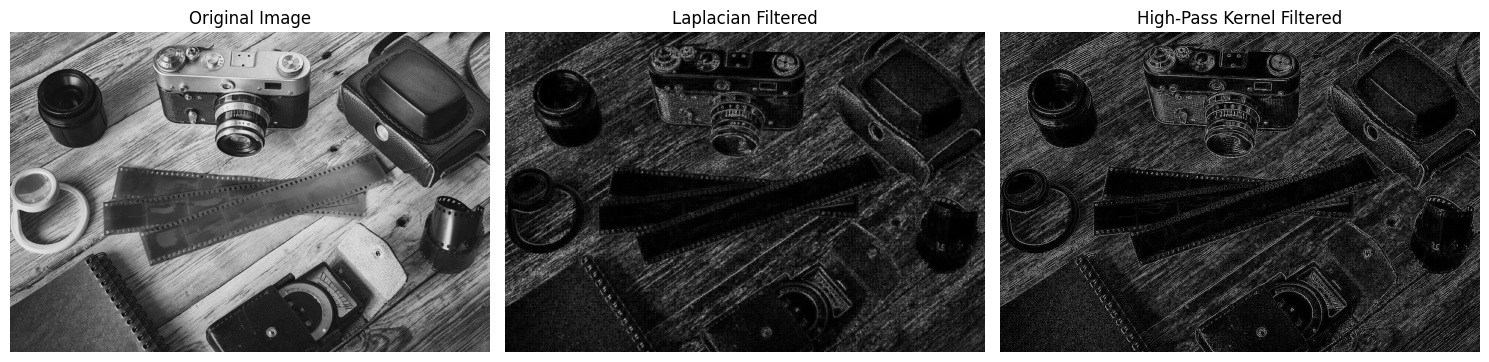

In [4]:
# --- 2. Sharpening Filters (High-Pass) ---
# Laplacian Filter
laplacian_filtered = cv2.Laplacian(image, cv2.CV_64F)
laplacian_filtered = np.uint8(np.absolute(laplacian_filtered))
# High-Pass Kernel Filter
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])
high_pass_filtered = cv2.filter2D(image, -1, kernel)
# Display Sharpening Results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(laplacian_filtered, cmap='gray')
plt.title("Laplacian Filtered")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(high_pass_filtered, cmap='gray')
plt.title("High-Pass Kernel Filtered")
plt.axis('off')

plt.tight_layout()
plt.show()